# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy import stats

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

### 0) Preparation: obtain general information about data
Before starting, I want to get a general idea of what the data looks like: what columns it contains, how many entries it has, whether there is any missing data, etc.

In [98]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


### 1) Is the distribution of body temperatures normal?
Null hypothesis: the distribution of body temperatures is normal.

From a glance at a histogram of the body temperature data, as well as a plot of its ecdf, it appears as if we should accept the null hypothesis and consider the distribution of body temperatures normal.

In [5]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

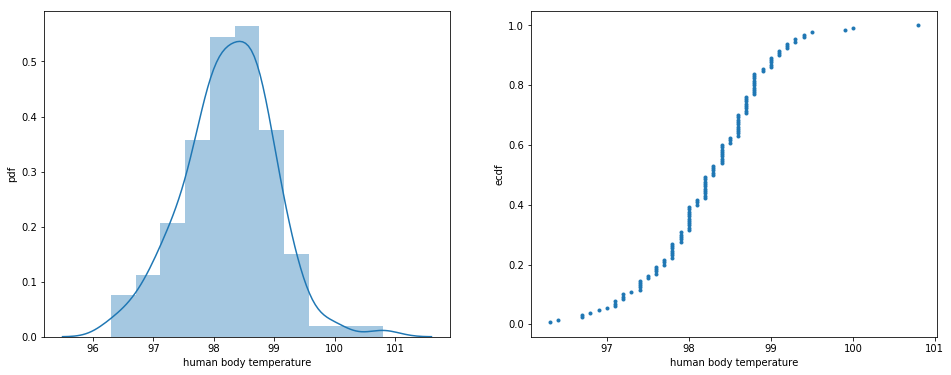

In [25]:
# Store temperature array in variable
sample_temps = df['temperature']

# Set number of bins equal to the square root of number of sample.
n_bins = int(np.sqrt(len(sample_temps)))
# Set up axes and figure size.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
# Plot pdf
sns.distplot(sample_temps, bins=n_bins, ax=ax1)
# compute coordinates for ecdf
x,y = ecdf(sample_temps)
# plot ecdf
ax2.plot(x, y, marker='.', linestyle='none')
# set labels
ax1.set_xlabel('human body temperature')
ax1.set_ylabel('pdf')
ax2.set_xlabel('human body temperature')
ax2.set_ylabel('ecdf')
# show plots
plt.show()

In [165]:
def eval_hnull(p, alpha):
    if p >= alpha:
        print('The null hypothesis should not be rejected.') 
        print('Probability is %0.2f of making a type 1 error, which is above a significance level of %0.2f.' % (p, alpha))

    else:
        print('The null hypothesis can be rejected.') 
        print('Probability is %0.2f of making a type 1 error, which is below a significance level of %0.2f.' % (p, alpha))
    return
# run a normality test on the sample data
k2, p = stats.normaltest(sample_temps)
# set a significance threshold alpha
alpha = 5e-2

eval_hnull(p, alpha)

The null hypothesis should not be rejected.
Probability is 0.26 of making a type 1 error, which is above a significance level of 0.05.


### 2) Is the sample size large? Are the observations independent?
The sample size is large (n > 30). Observations are independent, as no human's body temperature can affect that of another. The z-test and central limit theorem can therefore be applied.

In [27]:
# Test sample size using if/then statements.
if len(sample_temps) > 30:
    print("Sample size is equal to %.0f (n > 30), sample size is large." % len(df['temperature'], ))
else:
    print("Sample size is equal to %.0f (n <= 30), sample size is small." % len(df['temperature'], ))

Sample size is equal to 130 (n > 30), sample size is large.


### 3) Is the true population mean really 98.6 degrees F?
Null hypothesis: The true population mean is 98.6 degrees farenheit. 

According to the bootstrap method, 98.6 is outside of a 95% confidence interval from the mean of 10,000 replications of the sample data, and the null hypothesis should be rejected.

In [100]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, len(data)))
    return bs_replicates

# store null hypothesis value in variable
h_null_mean = 98.6
# store sample mean in variable
sample_mean = np.mean(sample_temps)
# draw 10,000 replicates of sample temperatures, taking the mean of each
bs_mean = draw_bs_reps(sample_temps, np.mean, size=1000)
# compute a 99% confidence interval for the means of the bootstrapped samples
conf_int = np.percentile(bs_mean, [0.5, 99.5])

if h_null_mean < conf_int[0] or h_null_mean > conf_int[1]:
    print(str(h_null_mean) + 
          ' is outside of a 99% confidence interval ({:0.2f} to {:0.2f}) '.format(conf_int[0], conf_int[1]) +
          'from the mean of the sample values ({:0.2f}).'.format(sample_mean))
    print('The null hypothesis can be rejected with less than a 1% chance of a type 1 error.')

else:
    print(str(h_null_mean) + 
          ' is inside of a 99% confidence interval ({:0.2f} to {:0.2f}) '.format(conf_int[0], conf_int[1]) +
          'from the mean of the sample values ({:0.2f}).'.format(sample_mean))
    print('The null hypothesis should not be rejected.')             

98.6 is outside of a 99% confidence interval (98.09 to 98.41) from the mean of the sample values (98.25).
The null hypothesis can be rejected with less than a 1% chance of a type 1 error.


When the standard deviation of a population is unknown, a z-test cannot be used, and a t-test is the only option.

In [161]:
# set standard deviation equal to that of sample
std_dev = np.std(sample_temps)
# compute z-score
tscore = (sample_mean - 98.6)/(std_dev / np.sqrt(len(sample_temps)))
# convert z-score to p-value
p_value = stats.norm.sf(abs(t_score))*2

print('Based on a one sample t-test, there is approximately a {:0.5f} probability '.format(p_value) + 
      'that the true population mean of the sample data is 98.6.')

Based on a one sample t-test, there is approximately a 0.00000 probability that the true population mean of the sample data is 98.6.


The ttest_1samp function in the scipy stats package yields the same result.

In [49]:
t_score, p_value = stats.ttest_1samp(sample_temps, 98.6)
print('Based on a one sample t-test, there is approximately a {:0.5f} probability '.format(p_value) + 
      'that the true population mean of the sample data is 98.6.')

Based on a one sample t-test, there is approximately a 0.00000 probability that the true population mean of the sample data is 98.6.


If we were to divide the sample into two separate groups, translate one group so that it meets the conditions of the null hypothesis, and then test for the probability that the means are equal, it also yields an extremely unlikely result.

In [48]:
sample_group1 = sample_temps
sample_group2 = sample_temps + h_null_mean - sample_mean
t_score, p_value = stats.ttest_rel(sample_group1, sample_group2)
print('Based on a two sample t-test, there is a {:0.5f} probability '.format(p_value) +
      'that the sample mean could have a value of 98.6.')

Based on a two sample t-test, there is a 0.00000 probability that the sample mean could have a value of 98.6.


In all cases, it is safe to reject the null hypothesis that 98.6 is the true population mean based on our sample data.

### 4) Draw a small sample of size 10 from the data and repeat both frequentist tests.
Drawing a small sample of size 10 and repeating the t-test yields a much greater probability that the sample was drawn from a population with a mean temperature of 98.6 degrees, which indicates that we should accept the null hypothesis. 

However, a two sample t-test of size, comparing the original sample to one that has been shifted so that its mean is 98.6 indicates the null hypothesis should be rejected.

The two-sample t-test is the proper one to use for a sample size of 10, as the variance among the samples is quite high, and the p-value of the one sample test will vary dramatically depending on the sample whereas the results of the two sample test will remain consistent.

In [87]:
sample_temps_10 = np.random.choice(sample_temps, 10)

t_score, p_value = stats.ttest_1samp(sample_temps_10, 98.6)
print('Based on a one sample t-test, there is approximately a {:0.5f} probability '.format(p_value) + 
      'that the true population mean of the sample data is 98.6.')

Based on a one sample t-test, there is approximately a 0.49288 probability that the true population mean of the sample data is 98.6.


In [88]:
sample_10_group1 = sample_temps_10
sample_10_group2 = sample_temps_10 + h_null_mean - sample_mean
t_score, p_value = stats.ttest_rel(sample_10_group1, sample_10_group2)
print('Based on a two sample t-test, there is a {:0.5f} probability '.format(p_value) +
      'that the sample mean could have a value of 98.6.')

Based on a two sample t-test, there is a 0.00000 probability that the sample mean could have a value of 98.6.


### 5) At what temperature should we consider someone's temperature to be "abnormal"?

Statistically, a measurement is considered abnormal when it is 2 or more standard deviations away from the mean of a normal distribution. A near-equivalent to this is considering any measurement outside of a 95% confidence interval to be abnormal.

In [124]:
bs_reps = draw_bs_reps(sample_temps, np.mean, 10000)
bs_reps_std = np.std(draw_bs_reps(sample_temps, np.mean, 10000))

conf_int = np.percentile(bs_reps, [2.5, 97.5])

print('The lower bound of an expected temperature range,' + 
      'as given by a 95% percentile is {:0.2f} '.format(conf_int[0]) + 
      'and the upper bound is {:0.2f}. \n'.format(conf_int[1]) +
      'Anything outside of this range can be considered abnormal.')

print('\nThe lower and upper bounds of as given by two standard deviations from the mean '+
      'are {:0.2f} and {:0.2f}, respectively'.format(sample_mean - 2*bs_reps_std, sample_mean + 2*bs_reps_std))

The lower bound of an expected temperature range,as given by a 95% percentile is 98.13 and the upper bound is 98.37. 
Anything outside of this range can be considered abnormal.

The lower and upper bounds of as given by two standard deviations from the mean are 98.12 and 98.38, respectively


### 6) Is there a significant difference between males and females in normal temperature?

Null hypothesis: There is no significant difference in body temperature between males and females.  
Alternate hypothesis: There is a statistaclly significant difference in body temperature between males and females.

A brief exploration of the sample data separated by gender reveals that ecdf plots and the mean body temperature for each gender appear to be quite different.

Bootstrapping 10,000 samples for each gender and computing a 95% confidence interval shows very little overlap and that the null hypothesis is quite improbable.

Conducting a 2 sample t-test on these samples, treating them as independent, shows that there only a 2% chance of making a type 1 error in rejecting the null hypothesis. The null hypothesis should be rejected.

In [139]:
# divide sample temperatures between males and females.
m_sample_temps = df[df['gender'] == 'M']['temperature']
f_sample_temps = df[df['gender'] == 'F']['temperature']

In [157]:
# compute the mean value of each sample
m_sample_mean = np.mean(m_sample_temps)
f_sample_mean = np.mean(f_sample_temps)
# print the mean values
print('Mean of male sample body temperatures is: {:02f}'.format(m_sample_mean))
print('Mean of female sample body temperatures is: {:02f}'.format(f_sample_mean))

Mean of male sample body temperatures is: 98.104615
Mean of female sample body temperatures is: 98.393846


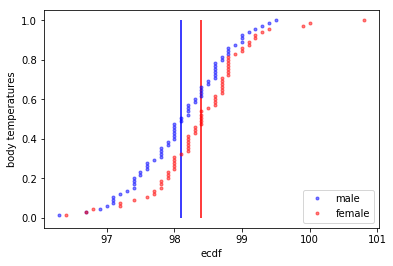

In [152]:
# compute separate ecdf plot coordinates for male and female body temperatures
x_m_sample, y_m_sample = ecdf(m_sample_temps)
x_f_sample, y_f_sample = ecdf(f_sample_temps)
# draw plots
plt.plot(x_m_sample, y_m_sample, marker='.', linestyle='none', color='b', alpha=0.5)
plt.plot(x_f_sample, y_f_sample, marker='.', linestyle='none', color='r', alpha=0.5)
# add vertical lines corresponding with the mean body temperature for each sex
plt.vlines(m_sample_mean, 0, 1, color='b')
plt.vlines(f_sample_mean, 0, 1, color='r')
# label plots
plt.xlabel('ecdf')
plt.ylabel('body temperatures')
# add legend
plt.legend(('male', 'female'), loc='lower right' )
# show plot
plt.show()

In [160]:
# draw 10,000 replicates of the samples for each gender
m_bs_reps = draw_bs_reps(m_sample_temps, np.mean, 10000)
f_bs_reps = draw_bs_reps(f_sample_temps, np.mean, 10000)

# calculate the confidence intervals for each
m_conf_int = np.percentile(m_bs_reps, [2.5, 97.5])
f_conf_int = np.percentile(f_bs_reps, [2.5, 97.5])

print('A 95% confidence interval for male body temperature' +
      'ranges from {:0.2f} to {:0.2f}'.format(m_conf_int[0], m_conf_int[1]))
print('A 95% confidence interval for female body temperature' +
      'ranges from {:0.2f} to {:0.2f}'.format(f_conf_int[0], f_conf_int[1]))

A 95% confidence interval for male body temperatureranges from 97.93 to 98.27
A 95% confidence interval for female body temperatureranges from 98.21 to 98.57


In [166]:
t_score, p_value = stats.ttest_ind(m_sample_temps, f_sample_temps)

eval_hnull(p_value, alpha)

The null hypothesis can be rejected.
Probability is 0.02 of making a type 1 error, which is below a significance level of 0.05.
